In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

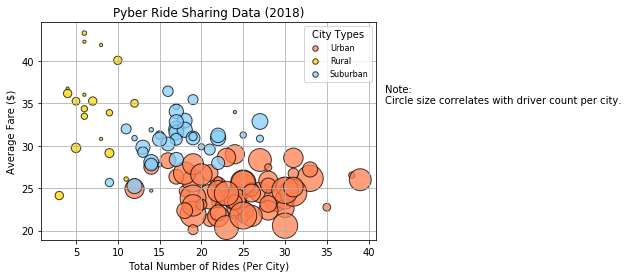

In [3]:
# Create a data frame for each city type, then group data frames by city
urban_df = combined_df[combined_df["type"] == "Urban"].groupby([combined_df["city"]])
rural_df = combined_df[combined_df["type"] == "Rural"].groupby([combined_df["city"]])
suburban_df = combined_df[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])

# For the 'Urban City Type' Create variables for each of the plot coordinates by calculating ride count (x),
# fare average(y), driver count average (s to indicate bubble size)
urban_x = urban_df["ride_id"].count()
urban_y = urban_df["fare"].mean()
urban_s = urban_df["driver_count"].mean()

# For the 'Rural City Type' Create variables for each of the plot coordinates by calculating ride count (x),
# fare average(y), driver count average (s to indicate bubble size)
rural_x = rural_df["ride_id"].count()
rural_y = rural_df["fare"].mean()
rural_s = rural_df["driver_count"].mean()

# For the 'Sub-Urban City Type' Create variables for each of the plot coordinates by calculating ride count (x),
# fare average(y), driver count average (s to indicate bubble size)
suburban_x = suburban_df["ride_id"].count()
suburban_y = suburban_df["fare"].mean()
suburban_s = suburban_df["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, label = "Urban", s=urban_s * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_s * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x, suburban_y, label = "Suburban", s=suburban_s  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Add in other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

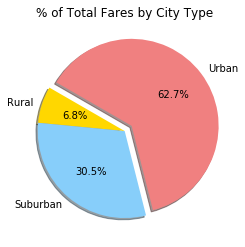

In [4]:
# Calculate Type Percents
type_groups = combined_df.groupby(['type'])
total_fares = type_groups['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

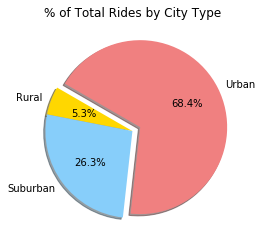

In [5]:
# Calculate Type Percents
rides_count = type_groups['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

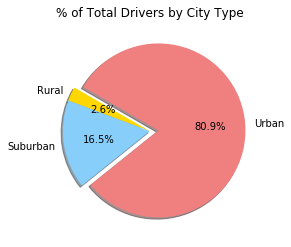

In [6]:
# Calculate Type Percents
driver_groups = city_df.groupby(['type'])
drivers_total = driver_groups['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_total, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()